## Computational Drug Discovery - Regression Random Forest

In this Jupyter notebook, I will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 4**, I will be building a regression model of Beta-secretase 1 inhibitors using the random forest algorithm

---

### Import libraries

In [27]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('data/beta_secretase_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [3]:
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.384050
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.698970
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.337242
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.045757
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.251812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7229,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.356547
7230,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.036212
7231,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
7232,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.966576


### Input Features
The ***Beta-secretase 1*** dataset contains 881 input features and 1 output variable (pIC50 values).

In [4]:
X = df.drop('pIC50', axis = 1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7229,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7230,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7231,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7232,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Output features

In [5]:
Y = df.pIC50
Y

0       6.384050
1       8.698970
2       6.337242
3       5.045757
4       5.251812
          ...   
7229    5.356547
7230    5.036212
7231    5.000000
7232    4.966576
7233    5.567031
Name: pIC50, Length: 7234, dtype: float64

### Examine the data dimension

In [6]:
X.shape # 7234 compounds and 881 fingerprints

(7234, 881)

In [7]:
Y.shape 

(7234,)

### Remove low variance features

In [8]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold = (.8 * (1 - .8)))
X = selection.fit_transform(X)

In [9]:
X.shape

(7234, 160)

### Data Split (80/20

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [11]:
X_train.shape, Y_train.shape

((5787, 160), (5787,))

In [12]:
X_test.shape, Y_test.shape

((1447, 160), (1447,))

### Building a Regression Model using Random Forest

In [22]:
import numpy as np
np.random.seed(150)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.394113270296061

In [23]:
Y_pred = model.predict(X_test)
Y_pred

array([6.93611495, 4.15455109, 6.7416112 , ..., 3.69201139, 3.56503221,
       6.18343845])

### Scatter Plot of Experimental vs Predicted pIC50 Values

<function matplotlib.pyplot.show(close=None, block=None)>

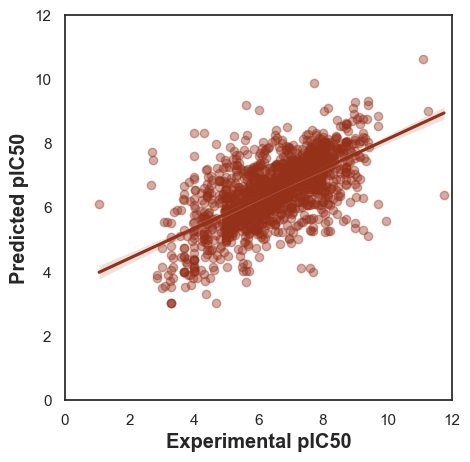

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes = True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws = {'alpha':0.4}, color = '#953019')
ax.set_xlabel('Experimental pIC50', fontsize = 'large', fontweight = 'bold')
ax.set_ylabel('Predicted pIC50', fontsize = 'large', fontweight = 'bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show